<a href="https://colab.research.google.com/github/rahul0van/BUSI652/blob/main/Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#  Load the Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, header=None, names=columns,  skipinitialspace=True)

print(df.describe)
print(df.info)

<bound method NDFrame.describe of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1    

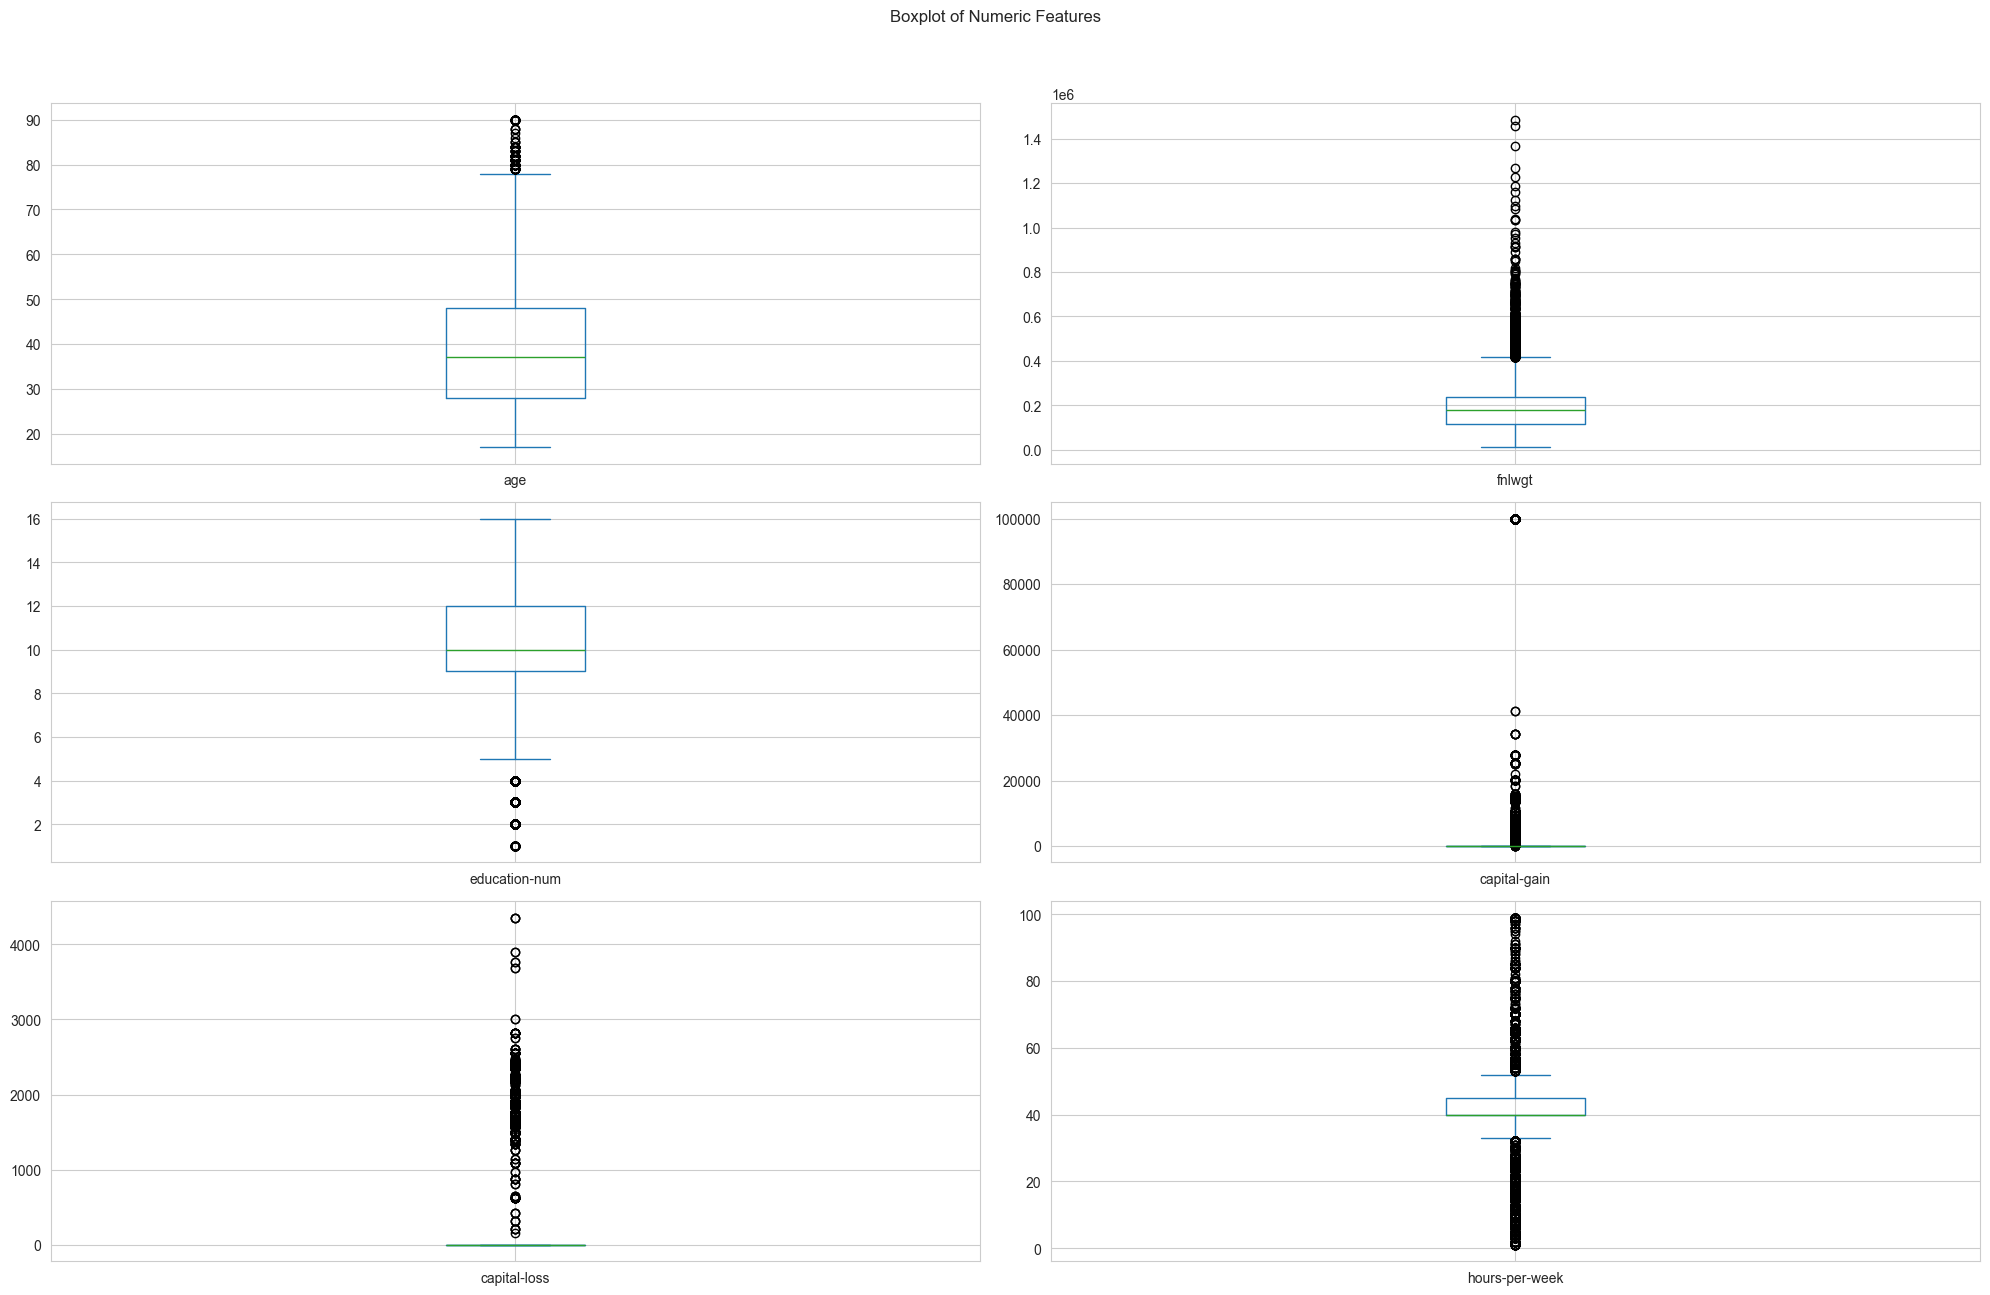

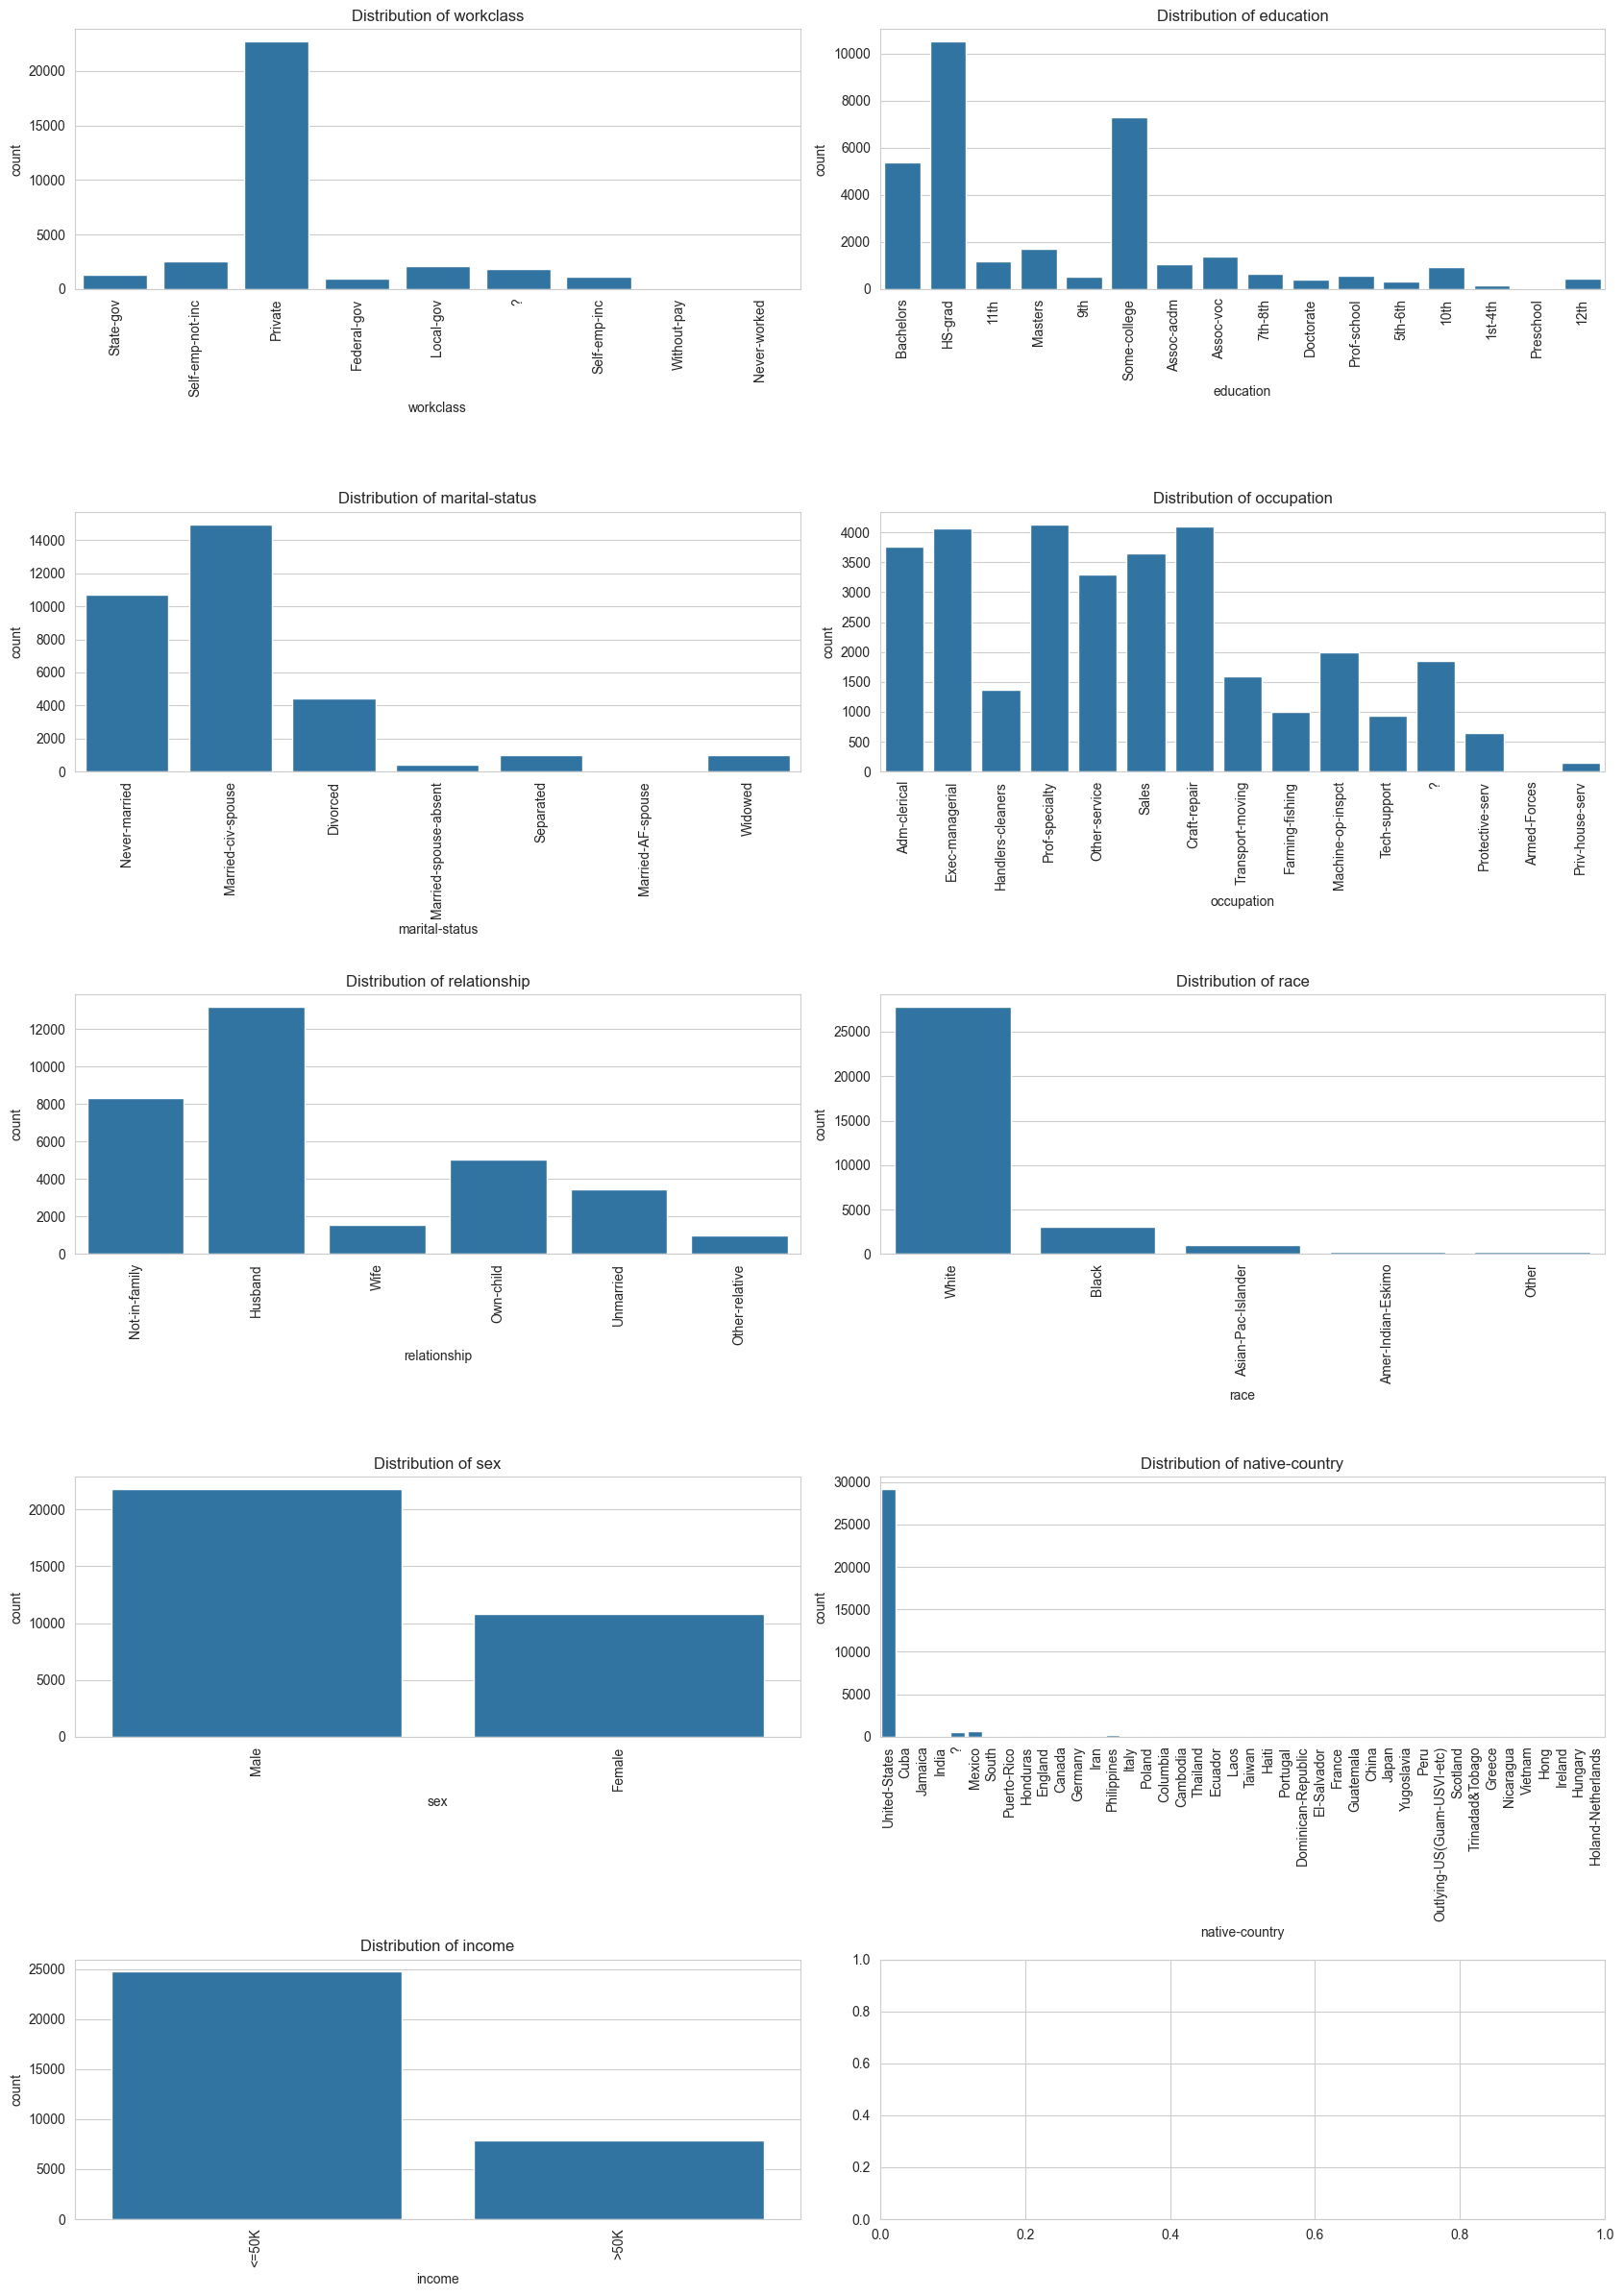

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Encode Categorical Variables
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'income']
# Distribution of Numeric Features
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df[numeric_features].plot(kind='box', subplots=True, layout=(4, 2), figsize=(20, 17), sharex=False, sharey=False)
plt.suptitle('Boxplot of Numeric Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Distribution of Categorical Features
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(17, 24))
axes = axes.flatten()

for i, column in enumerate(categorical_features):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Missing values before handling:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
Columns with '?' values:
                Missing Count  Missing Percentage
occupation               1843            5.664321
workclass                1836            5.642807
native-country            582            1.788733

Cleaned DataFrame shape: (30139, 15)


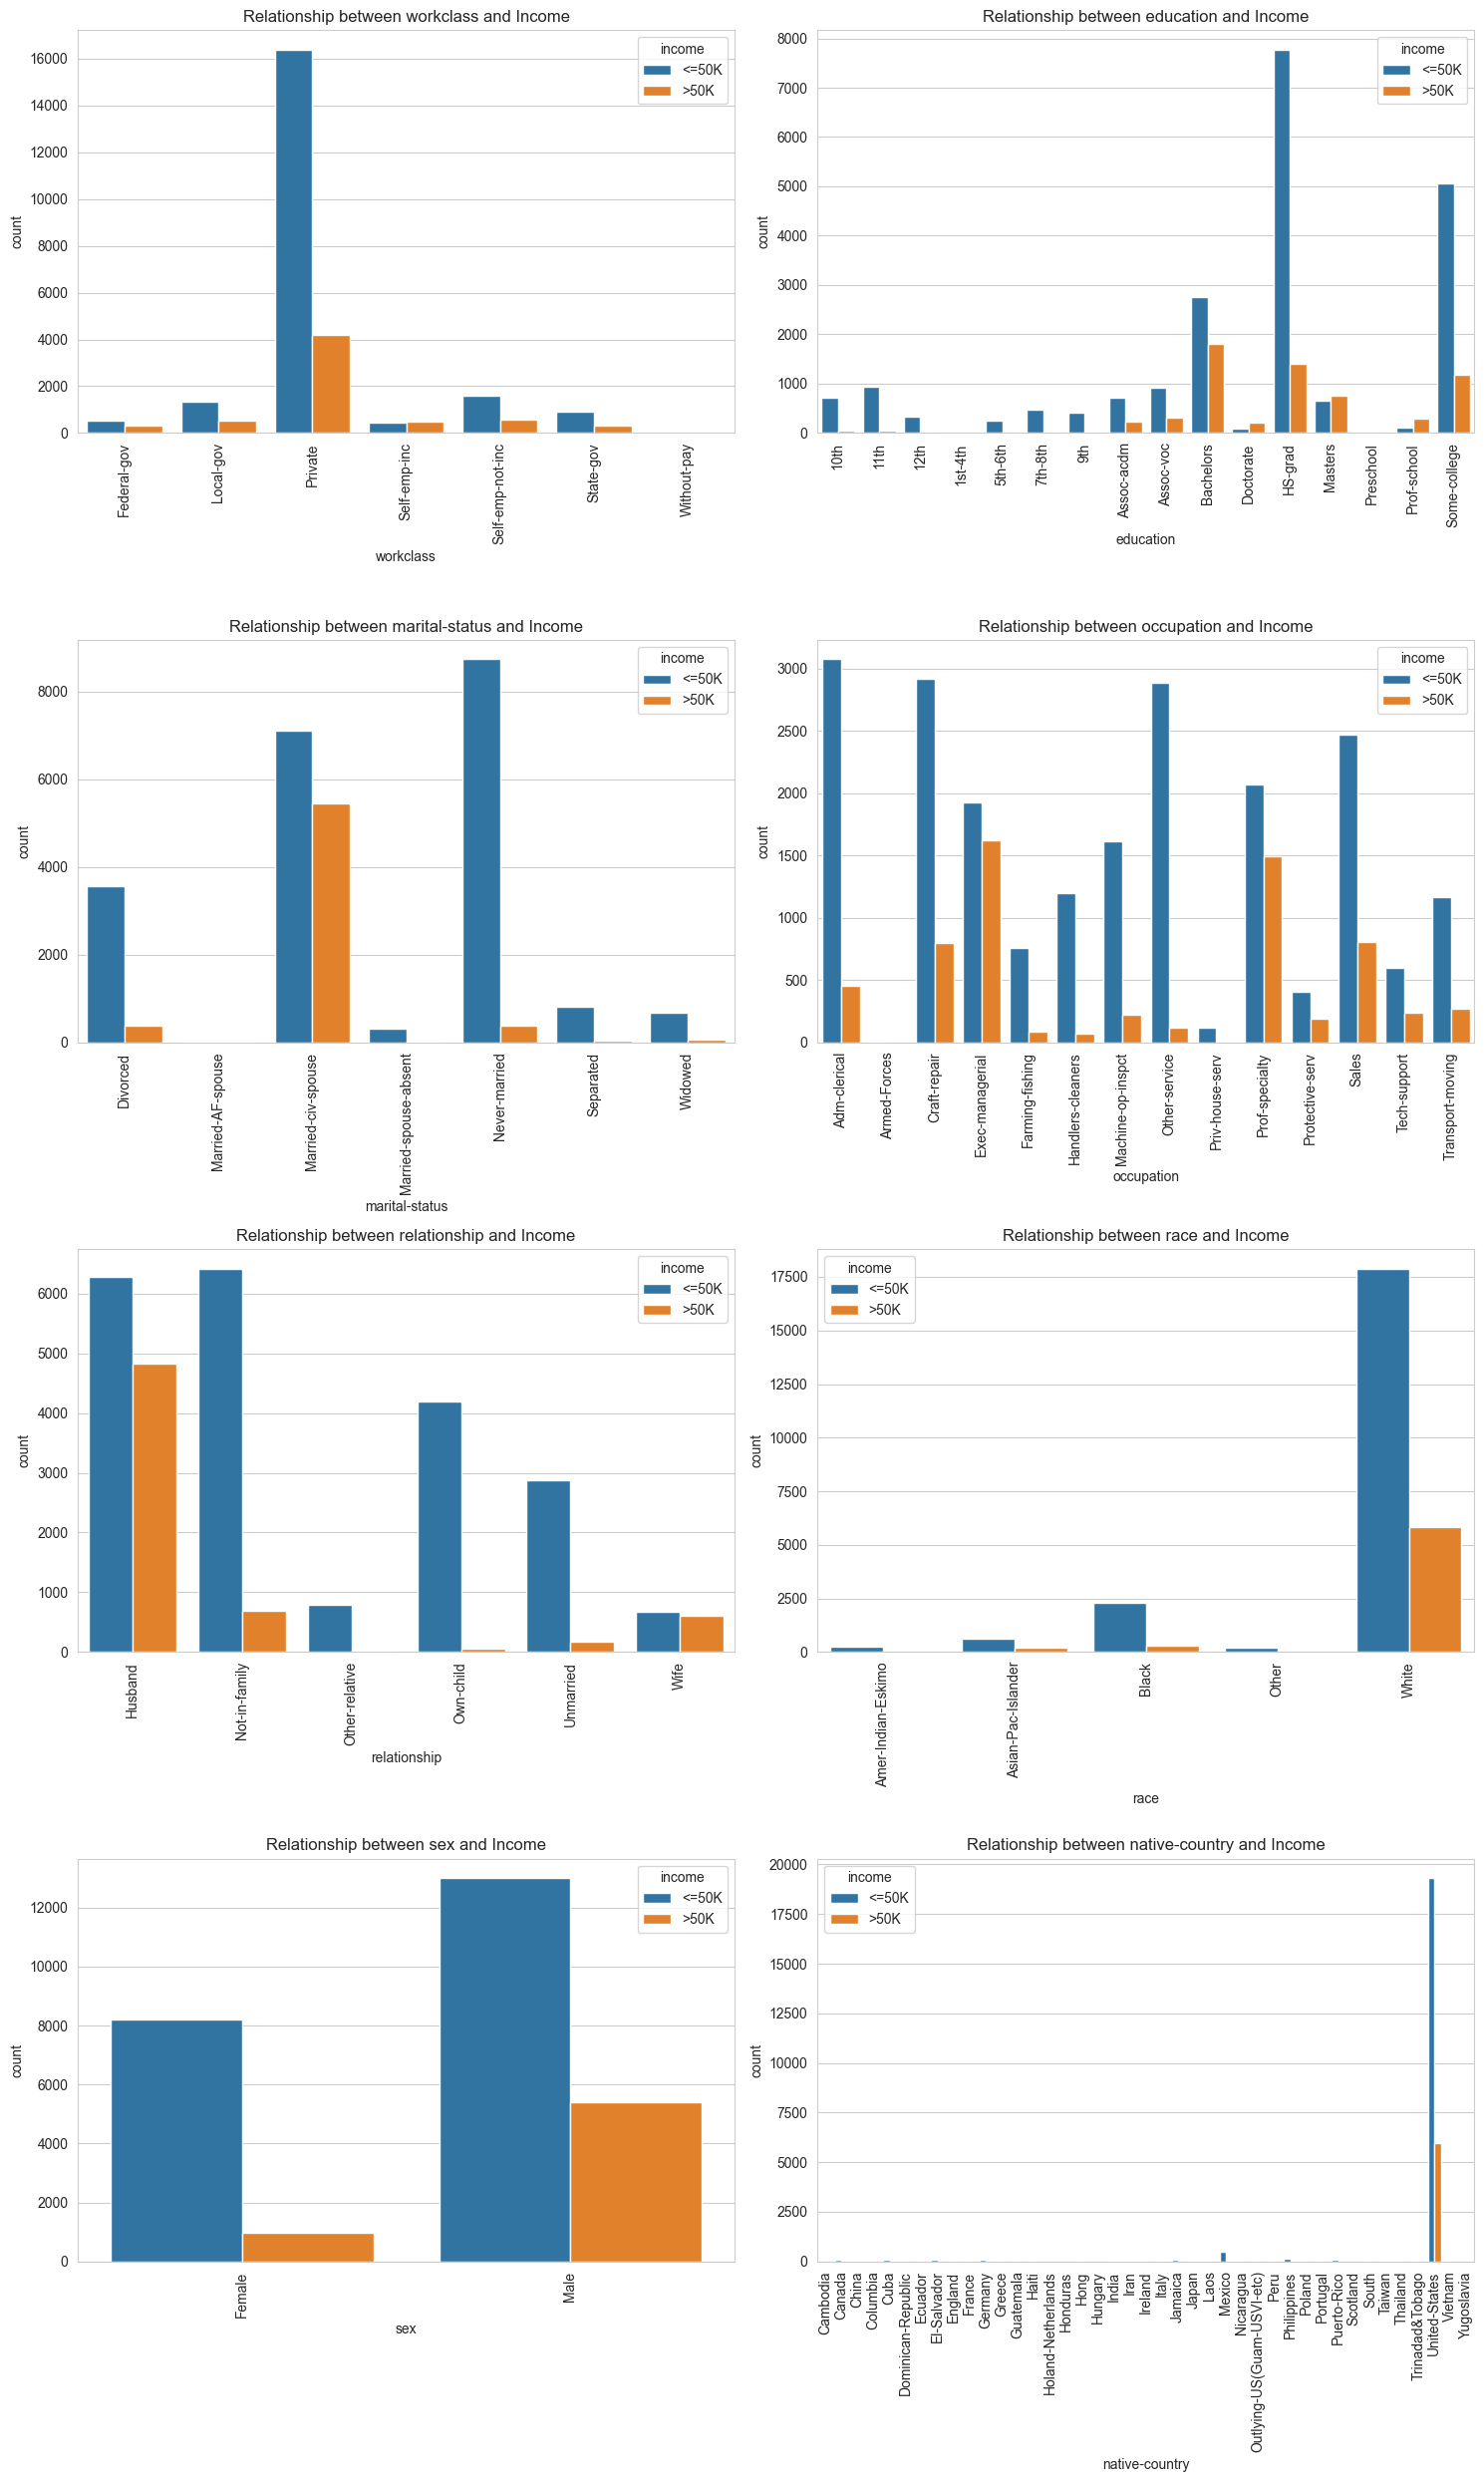

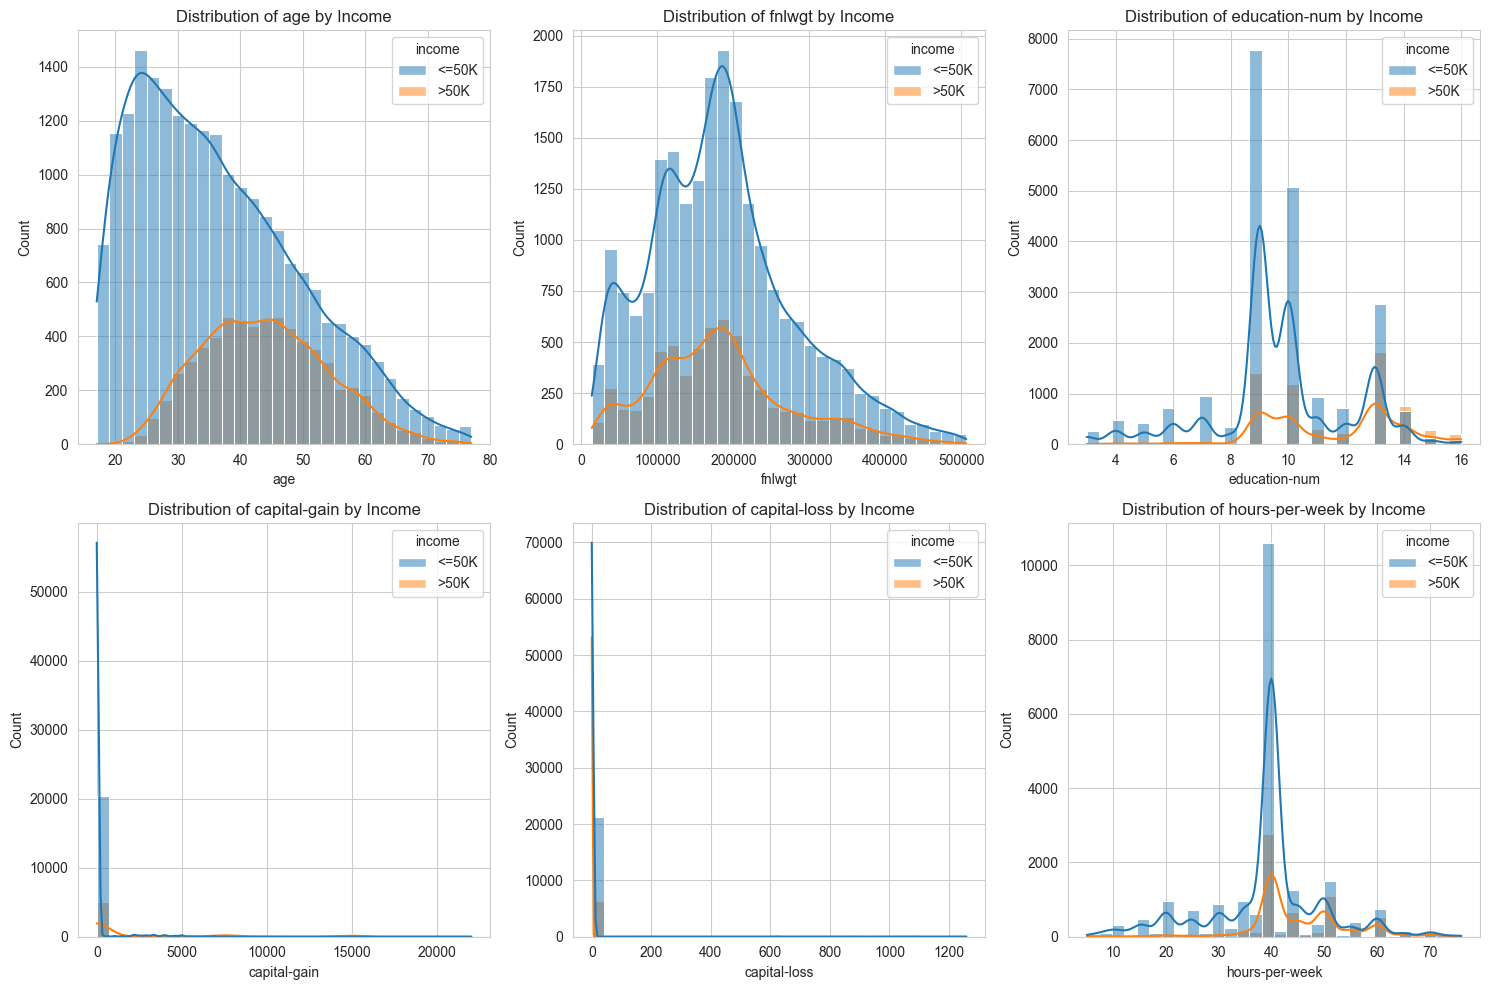


Data cleaning complete. Summary of cleaned data:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  

In [ ]:
import numpy as np
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())
df = df.dropna()

# Remove Duplicates
df = df.drop_duplicates()
# Identify columns with "?" values
missing_placeholder = "?"

# Initialize dictionaries to store counts and percentages
missing_counts = {}
missing_percentages = {}

# Calculate the count and percentage of "?" values in each column
for column in df.columns:
    count = df[column].eq(missing_placeholder).sum()
    if count > 0:  # Only consider columns with "?" values
        missing_counts[column] = count
        missing_percentages[column] = (count / len(df)) * 100

# Convert results to DataFrame for better visualization
missing_data_df = pd.DataFrame({
    'Missing Count': pd.Series(missing_counts),
    'Missing Percentage': pd.Series(missing_percentages)
}).sort_values(by='Missing Count', ascending=False)

# Display the results
print("Columns with '?' values:")
print(missing_data_df)

# Define columns to check for missing values
columns_to_check = ['native-country', 'workclass', 'occupation']  # Add more columns as needed
before_drop = df.shape
# Drop rows where any of the specified columns have the value '?'
df = df[~df[columns_to_check].isin(['?']).any(axis=1)]
#droped_number = before_drop-df.shape
# Display the shape of the cleaned DataFrame
#print("\nDroped DataFrame data number:", droped_number)
print("\nCleaned DataFrame shape:", df.shape)

# Convert Data Types
# For categorical features, ensure they are treated as objects
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df[categorical_features] = df[categorical_features].astype('category')


# Handle Outliers
# Identify numeric outliers using Z-score
from scipy import stats
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
z_scores = np.abs(stats.zscore(df[numeric_features]))
df = df[(z_scores < 3).all(axis=1)]  # Keeping rows with Z-score < 3

#Visulization of Cleaned Data
plt.figure(figsize=(15, 25))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    sns.countplot(data=df, x=feature, hue='income')
    plt.xticks(rotation=90)
    plt.title(f'Relationship between {feature} and Income')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=feature, hue='income', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Income')

plt.tight_layout()
plt.show()
# Trim leading/trailing spaces from categorical variables
df[categorical_features] = df[categorical_features].apply(lambda x: x.str.strip())
#createBoxplot(df,numeric_features)
print("\nData cleaning complete. Summary of cleaned data:")
print(df.head())
print(df.info())
print(df.describe(include='all'))
data =df.copy()

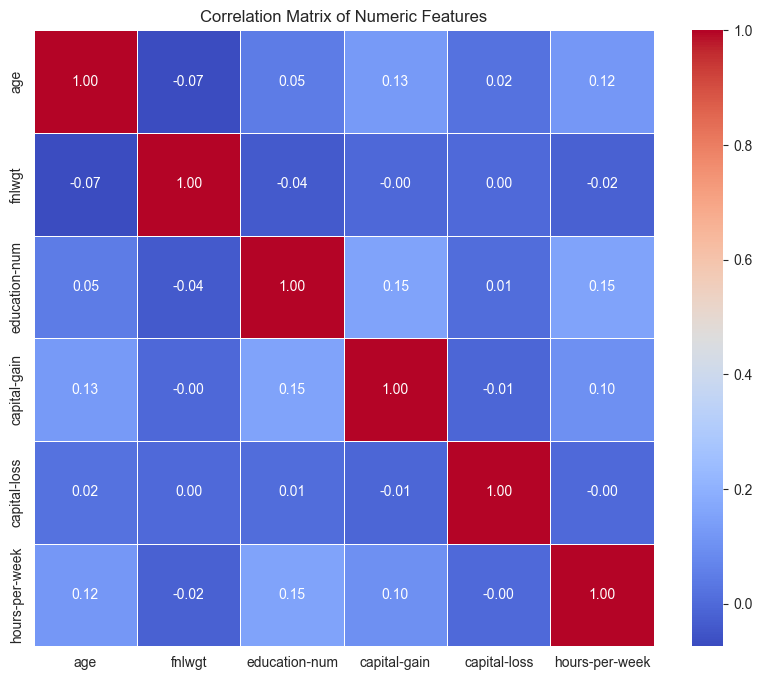

age               0.245765
fnlwgt           -0.009573
education-num     0.318840
capital-gain      0.339953
capital-loss     -0.017266
hours-per-week    0.231610
dtype: float64


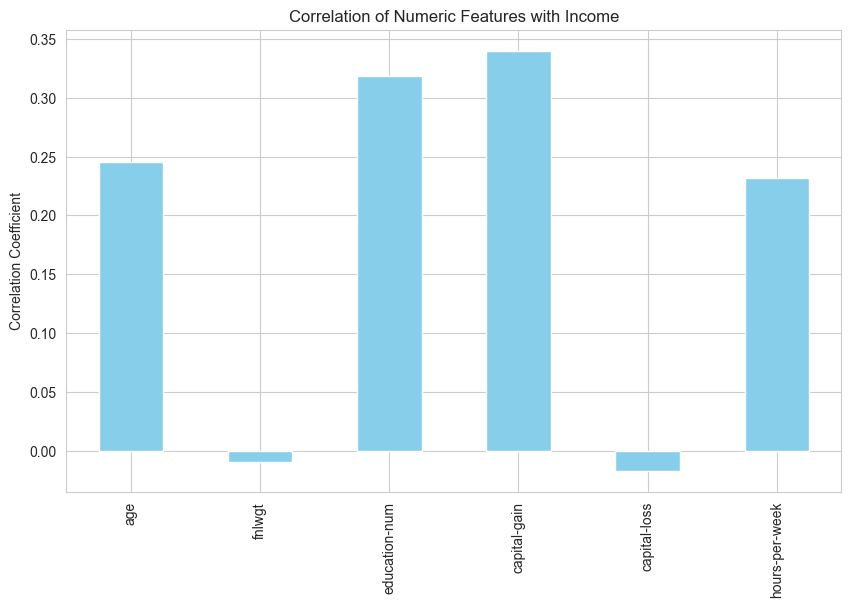

Feature: workclass
Chi-Square Statistic = 661.1509542869759, p-value = 1.4894748863385892e-139

Feature: education
Chi-Square Statistic = 3310.8316600715343, p-value = 0.0

Feature: marital-status
Chi-Square Statistic = 5438.166112385622, p-value = 0.0

Feature: occupation
Chi-Square Statistic = 3085.149986604697, p-value = 0.0

Feature: relationship
Chi-Square Statistic = 5576.3459071378975, p-value = 0.0

Feature: race
Chi-Square Statistic = 267.5641481315527, p-value = 1.068601035768978e-56

Feature: sex
Chi-Square Statistic = 1226.688345923605, p-value = 9.66562179101001e-269

Feature: native-country
Chi-Square Statistic = 244.3772721806086, p-value = 1.485689701480789e-31



In [ ]:
# Convert target variable to numeric
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
# Correlation Analysis
# For correlation analysis, we only use numeric features
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Calculate correlations
corr_with_target = df[numeric_features].corrwith(df['income'])
print(corr_with_target)

# Plot correlation with target variable
plt.figure(figsize=(10, 6))
corr_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Numeric Features with Income')
plt.ylabel('Correlation Coefficient')
plt.show()

from scipy.stats import chi2_contingency

# Store Chi-Square statistics
chi_square_values = []

# Chi-Square Test
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['income'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_values.append(chi2)  # Store the Chi-Square statistic
    print(f'Feature: {feature}')
    print(f'Chi-Square Statistic = {chi2}, p-value = {p}\n')

In [ ]:
# Use One-Hot Encoding to convert categorical variables to binary columns
le = LabelEncoder()
for feature in categorical_features:
    df[feature+'_cate'] = df[feature]
    data[feature+'_cate'] = data[feature]
    df[feature] = le.fit_transform(df[feature])
    data[feature] = le.fit_transform(data[feature])
# Create interaction feature between education level and occupation
df['education_occupation'] = df['education'] * df['occupation']

# Aggregate features for analysis
df['combined_skill_score'] = df['education-num'] * df['hours-per-week']

scaler = StandardScaler()
df[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(
    df[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
features = df.select_dtypes(include=['number'])
# Split Data into Training and Test Sets
X = features.drop('income', axis=1)
y = df['income']

print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_scaled = X_train

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'education_occupation', 'combined_skill_score'],
      dtype='object')


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("\nDecision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_dt))

# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print("\nLogistic Regression Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_lr))




Decision Tree Classifier
Accuracy: 0.8089114290889332
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      4197
           1       0.60      0.59      0.60      1324

    accuracy                           0.81      5521
   macro avg       0.74      0.73      0.74      5521
weighted avg       0.81      0.81      0.81      5521

AUC-ROC Score: 0.7347191599236111

Logistic Regression Classifier
Accuracy: 0.8208657851838435
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4197
           1       0.72      0.42      0.53      1324

    accuracy                           0.82      5521
   macro avg       0.78      0.68      0.71      5521
weighted avg       0.81      0.82      0.80      5521

AUC-ROC Score: 0.8458098757060684


/Users/rahulshrestha/IdeaProjects/PredectiveAnalysis/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


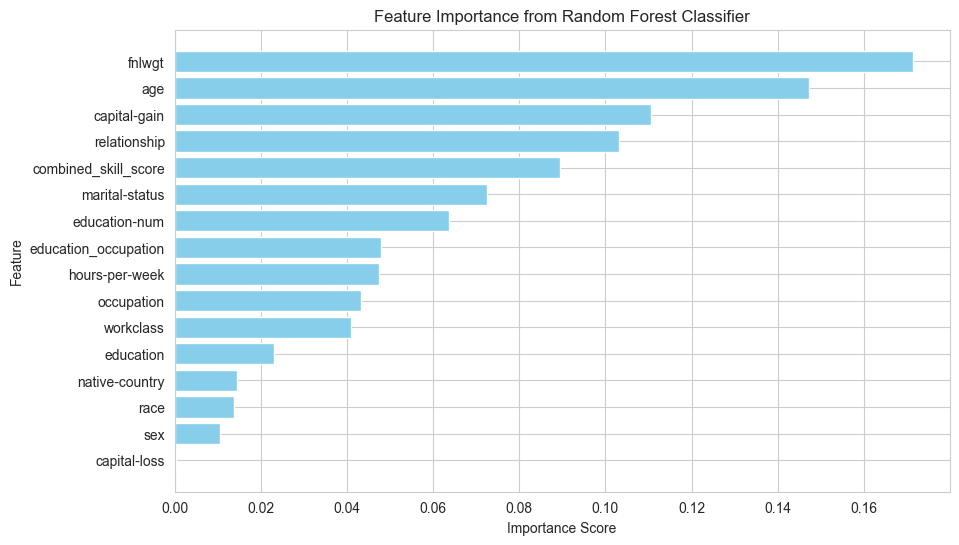

Accuracy: 0.8433254845136751
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4197
           1       0.71      0.59      0.64      1324

    accuracy                           0.84      5521
   macro avg       0.79      0.76      0.77      5521
weighted avg       0.84      0.84      0.84      5521

AUC-ROC Score: 0.8939136680134783
Feature Importances:
                       importance
fnlwgt                  0.171301
age                     0.147319
capital-gain            0.110494
relationship            0.103114
combined_skill_score    0.089437
marital-status          0.072600
education-num           0.063757
education_occupation    0.048034
hours-per-week          0.047433
occupation              0.043364
workclass               0.040912
education               0.023125
native-country          0.014521
race                    0.013842
sex                     0.010450
capital-loss            0.000295


In [ ]:

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# Extract Feature Importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for Better Visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Predict and Evaluate
y_pred = rf_model.predict(X_test)

y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_rf))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute ROC curve and ROC AUC
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)


# Feature Importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,  # Number of parameter settings that are sampled
                                   cv=5,        # Number of folds in cross-validation
                                   verbose=2,   # Level of verbosity
                                   random_state=42,
                                   n_jobs=-1)    # Number of jobs to run in parallel

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)

# Predict and Evaluate the Best Model
y_pred_best = best_rf_model.predict(X_test)
y_pred_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best RandomForest AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba_best))

# Compute confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/rahulshrestha/IdeaProjects/PredectiveAnalysis/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
190 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
113 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rahulshrestha/IdeaProjects/PredectiveAnalysis/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rahulshrestha/IdeaProjects/PredectiveAnalysis/venv/lib/python3.9/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/rahulshrestha/IdeaProjects/PredectiveAn

Best Hyperparameters: {'bootstrap': True, 'max_depth': 38, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 16, 'n_estimators': 143}
Accuracy: 0.8505705488136207
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4197
           1       0.74      0.58      0.65      1324

    accuracy                           0.85      5521
   macro avg       0.81      0.76      0.78      5521
weighted avg       0.84      0.85      0.84      5521

Best RandomForest AUC-ROC Score: 0.9069539312715816


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Bagging Classifier with Random Forest as the base estimator
bagging_rf_model = BaggingClassifier(estimator=best_rf_model,
                                     n_estimators=50, random_state=42)

# Train the bagging model
bagging_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging_rf = bagging_rf_model.predict(X_test)
y_pred_proba_bagging_rf = bagging_rf_model.predict_proba(X_test)[:, 1]
fpr_bagging_rf, tpr_bagging_rf, _ = roc_curve(y_test, y_pred_proba_bagging_rf)
roc_auc_bagging_rf = roc_auc_score(y_test, y_pred_proba_bagging_rf)

# Print metrics for Bagging Classifier
print("Bagging with Random Forest Accuracy:", accuracy_score(y_test, y_pred_bagging_rf))
print("Bagging with Random Forest Classification Report:\n", classification_report(y_test, y_pred_bagging_rf))
print("Bagging with Random Forest AUC-ROC Score:", roc_auc_bagging_rf)


Bagging with Random Forest Accuracy: 0.8505705488136207
Bagging with Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      4197
           1       0.75      0.57      0.65      1324

    accuracy                           0.85      5521
   macro avg       0.81      0.75      0.78      5521
weighted avg       0.84      0.85      0.84      5521

Bagging with Random Forest AUC-ROC Score: 0.9071218328154119


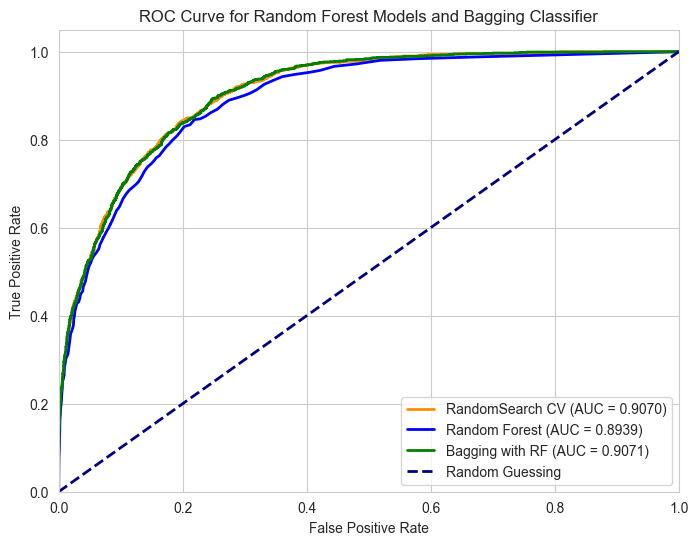

In [ ]:
# Plot all ROC curves on the same graph
plt.figure(figsize=(8, 6))

# Plot ROC curve for RandomSearch CV Model
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'RandomSearch CV (AUC = {roc_auc_best:.4f})')

# Plot ROC curve for the RandomForestClassifier Model
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.4f})')

# Plot ROC curve for the Bagging Classifier Model
plt.plot(fpr_bagging_rf, tpr_bagging_rf, color='green', lw=2, label=f'Bagging with RF (AUC = {roc_auc_bagging_rf:.4f})')

# Plot a diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Models and Bagging Classifier')
plt.legend(loc='lower right')
plt.show()

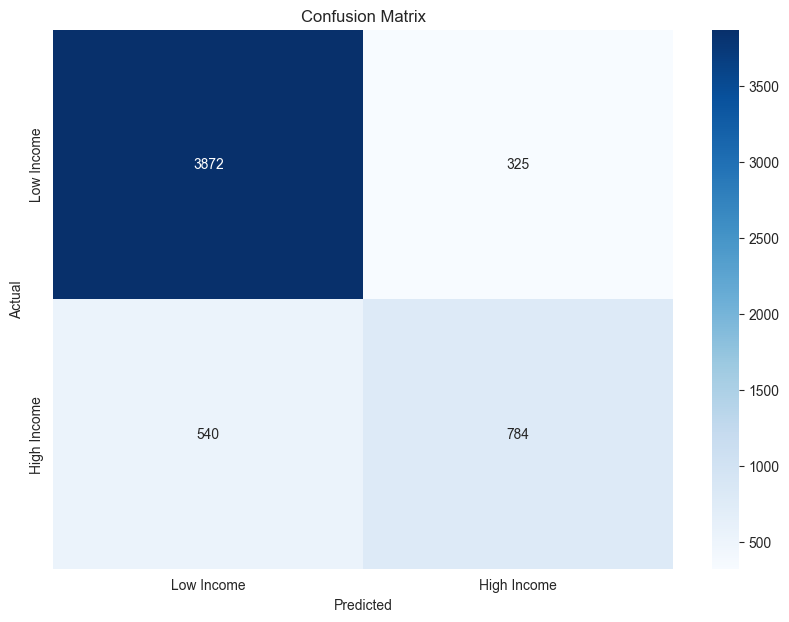

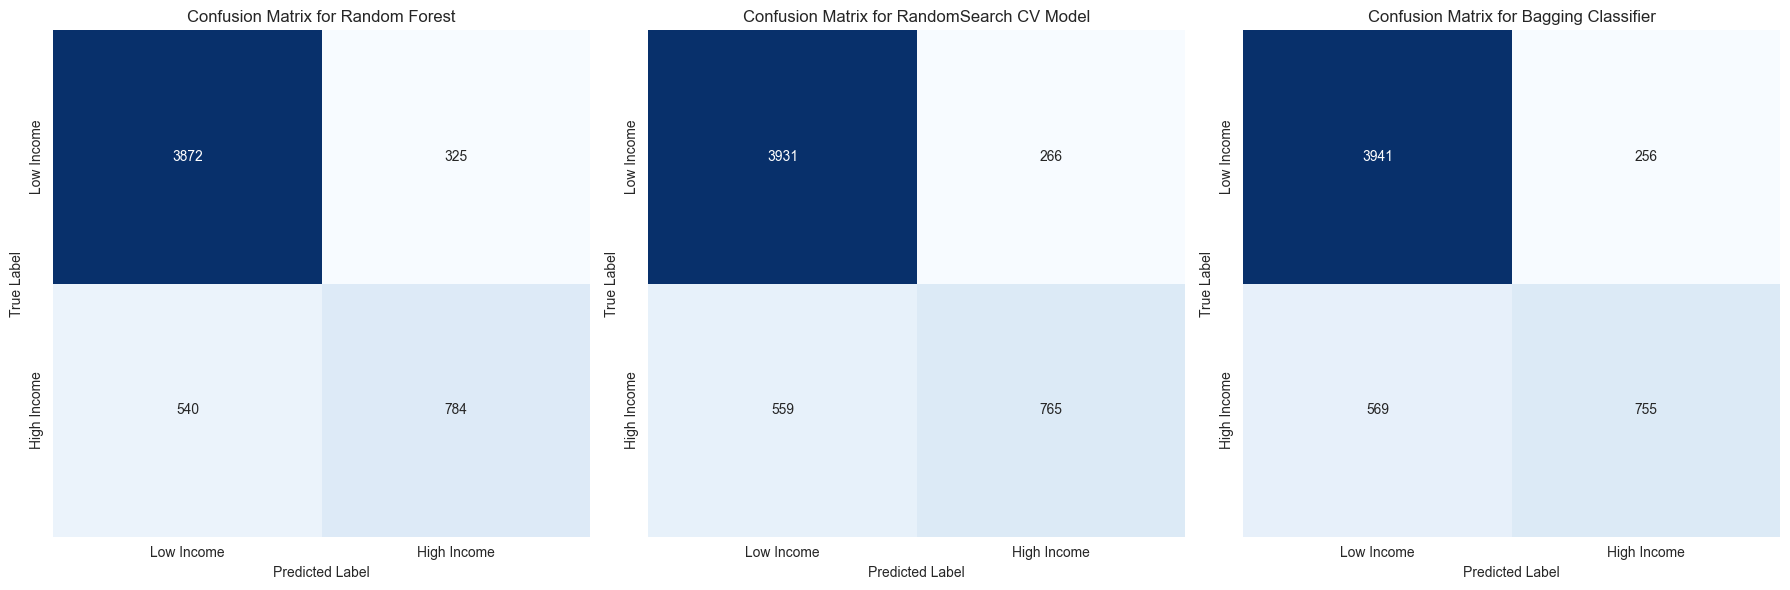

In [ ]:
# Compute confusion matrices
conf_matrix_rf = confusion_matrix(y_test, y_pred)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best)
conf_matrix_bagging_rf = confusion_matrix(y_test, y_pred_bagging_rf)
# Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Income', 'High Income'],
            yticklabels=['Low Income', 'High Income'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Plot confusion matrices in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion matrix for Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0], xticklabels=['Low Income', 'High Income'],yticklabels=['Low Income', 'High Income'])
axes[0].set_title('Confusion Matrix for Random Forest'),
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Confusion matrix for RandomizedSearchCV Model
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1], xticklabels=['Low Income', 'High Income'],yticklabels=['Low Income', 'High Income'])
axes[1].set_title('Confusion Matrix for RandomSearch CV Model')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Confusion matrix for Bagging Classifier Model
sns.heatmap(conf_matrix_bagging_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[2], xticklabels=['Low Income', 'High Income'],yticklabels=['Low Income', 'High Income'])
axes[2].set_title('Confusion Matrix for Bagging Classifier')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          5   77516          8             13               4   
1   50          4   83311          8             13               2   
2   38          2  215646         10              9               0   
3   53          2  234721          1              7               2   
4   28          2  338409          8             13               2   

   occupation  relationship  race  sex  ...  native-country  income  \
0           0             1     4    1  ...              37   <=50K   
1           3             0     4    1  ...              37   <=50K   
2           5             1     4    1  ...              37   <=50K   
3           5             0     2    1  ...              37   <=50K   
4           9             5     2    0  ...               4   <=50K   

     workclass_cate  education_cate marital-status_cate    occupation_cate  \
0         State-gov       Bachelors       Never-married       Adm-cl

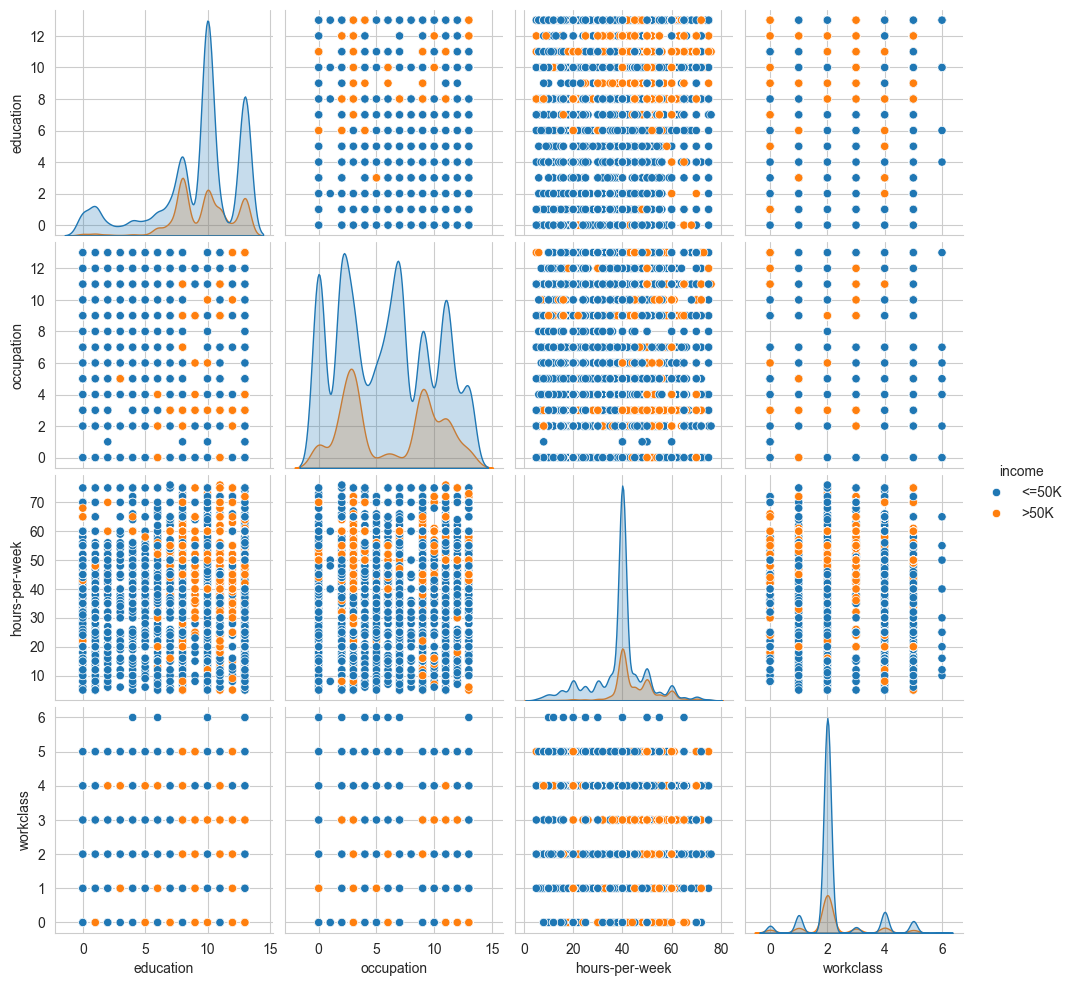

In [ ]:
import seaborn as sns
print(data.head())
# Create pair plot
sns.pairplot(data[['education', 'occupation', 'hours-per-week','workclass', 'income']], hue='income')
plt.show()


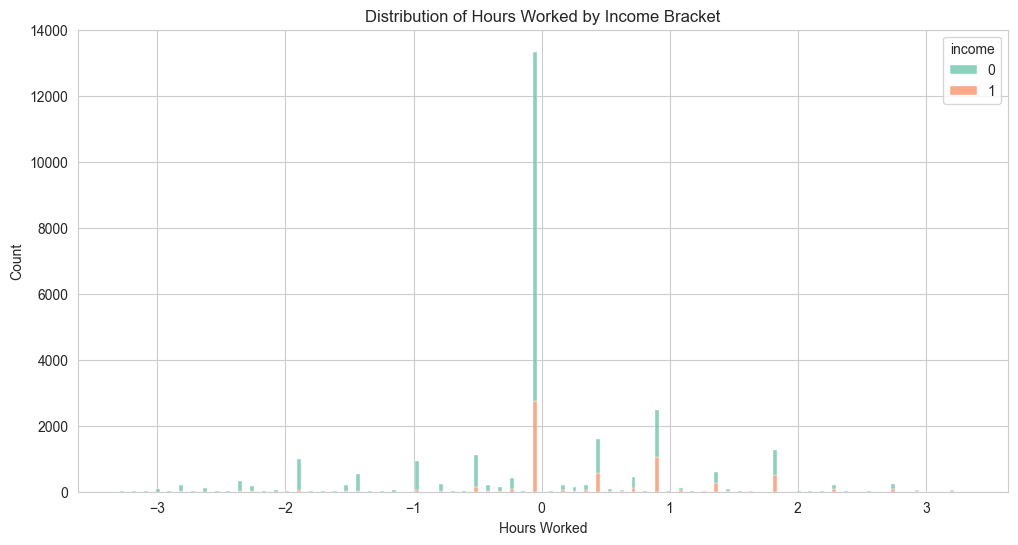

KeyError: 'ocupation'

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(features, x='hours-per-week', hue='income', multiple='stack', palette='Set2')
plt.title('Distribution of Hours Worked by Income Bracket')
plt.xlabel('Hours Worked')
plt.ylabel('Count')
plt.show()
import numpy as np

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X['ocupation'].min() - 1, X['ocupation'].max() + 1
y_min, y_max = X['age'].min() - 1, X['age'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict on mesh grid
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['ocupation'], X['age'], c=y, edgecolor='k', cmap='coolwarm')
plt.title('Decision Boundary with Key Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()